In [33]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
#create a pandas dataframes from csv files
users = pd.read_csv('new_users.csv', lineterminator='\n', index_col=0)
tweets = pd.read_csv('new_tweets.csv', lineterminator='\n', index_col=0)

In [35]:
tweets_clean = tweets.drop(columns=['created_at', 'text'])

In [36]:
scaler = StandardScaler()
scaler.fit(tweets_clean.values)

/Users/Koto/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1000: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/Koto/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/Koto/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/Koto/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


StandardScaler()

In [37]:
tweets_clean.head().values

array([[5.09354018e+17, 3.27746321e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+00, 6.40000000e+01],
       [5.23891872e+17, 3.27746321e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.60000000e+01, 5.60000000e+01],
       [5.28202578e+17, 3.27746321e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.24000000e+02],
       [5.30119199e+17, 3.27746321e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 6.60000000e+01],
       [5.20435124e+17, 3.27746321e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.12000000e+02]])

In [38]:
scaler.transform(tweets_clean.values)

array([[ 0.53950749,         nan, -0.17556617, ..., -0.63395477,
        -0.46906055,  0.12701179],
       [ 0.60072072,         nan, -0.17556617, ..., -0.63395477,
         0.86466602, -0.05565688],
       [ 0.61887141,         nan, -0.17556617, ..., -0.63395477,
         0.14650556,  1.49702686],
       ...,
       [-1.6051832 ,         nan, -0.17556617, ..., -0.63395477,
        -0.7768436 , -1.33433761],
       [-1.58459786,         nan, 11.38727699, ...,  2.87288819,
         0.76207167,  1.86236421],
       [-1.54481669,         nan,  0.40841581, ...,  1.11946671,
         0.55688297,  1.13168951]])

In [39]:
scaler.inverse_transform(scaler.transform(tweets_clean.head().values))

array([[5.09354018e+17,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+00, 6.40000000e+01],
       [5.23891872e+17,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.60000000e+01, 5.60000000e+01],
       [5.28202578e+17,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.24000000e+02],
       [5.30119199e+17,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 6.60000000e+01],
       [5.20435124e+17,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.12000000e+02]])

In [40]:
scaler = MinMaxScaler()
X = scaler.fit_transform(tweets_clean.values)

In [41]:
X[:5]

array([[5.09355345e-001, 1.09248774e-288, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.11267606e-002,
        1.52380952e-001],
       [5.23893237e-001, 1.09248774e-288, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000, 1.12676056e-001,
        1.33333333e-001],
       [5.28203954e-001, 1.09248774e-288, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 6.33802817e-002,
        2.95238095e-001],
       [5.30120580e-001, 1.09248774e-288, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000, 9.15492958e-002,
        1.57142857e-001],
       [5.20436480e-001, 1.09248774e-288, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000, 1.47887324e-001,
        2.6

In [42]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3)

In [43]:
kmeans.labels_[:5]

array([0, 1, 0, 1, 1], dtype=int32)

In [44]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([6788298, 1556700, 2933703]))

In [45]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 6788298, 1: 1556700, 2: 2933703}

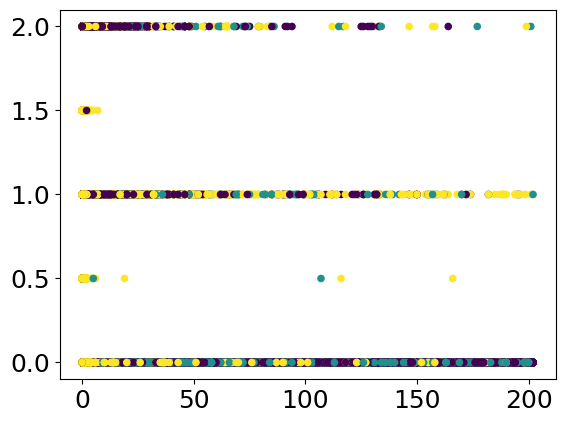

In [49]:
plt.scatter(tweets_clean['retweet_count'], tweets_clean['favorite_count'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

In [47]:
kmeans.cluster_centers_

array([[5.22695923e-01, 7.63984014e-19, 1.78783246e-02, 0.00000000e+00,
        1.22732680e-01, 7.63666765e-02, 2.14001039e-12, 2.30885713e-01,
        5.40793426e-02, 1.64710351e-01],
       [4.47896481e-01, 8.01901973e-20, 2.07462664e-02, 0.00000000e+00,
        3.43128091e-02, 7.98194899e-02, 9.99999679e-01, 1.48536648e-01,
        1.17301112e-01, 1.88970914e-01],
       [1.87606263e-02, 3.40687064e-07, 4.84770032e-03, 0.00000000e+00,
        3.03466150e-02, 2.45453105e-02, 1.87377934e-06, 8.20142782e-02,
        1.76469877e-02, 5.35776684e-02]])

In [48]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(tweets_clean['total_bill'], df['tip'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
centers

KeyError: 'total_bill'